# 필요한 패키지 import 및 2020년 뉴스 크롤링

In [ ]:
import requests
import time
import re
from bs4 import BeautifulSoup
import csv
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from palettable.colorbrewer.qualitative import Dark2_8
import random

#1월~12월 뉴스 크롤링
csv_filename = "naver_news_IT_11.csv"
csv_open = open(csv_filename, "w+", encoding='utf-8')
csv_writer = csv.writer(csv_open)
csv_writer.writerow( ('title', 'date') )  #제목 입력

#실행 도중 원인모를 실패가 발생하여 월별로 실행.
dt_index = pd.date_range(start='20201101', end='20201130')
dt_list = dt_index.strftime("%Y%m%d").tolist()

for date in dt_list:
        
    #최대 페이지가 넘어 갔을 때, 마지막 페이지가 보여지는 것을 이용해서 마지막 페이지 번호를 가져온다.    
    url = "https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1=105&date="+date+"&page=100"
    result = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})               
    soup = BeautifulSoup(result.content, 'html.parser') 
    
    headline_tag = soup.find('div', {'class': 'paging'}).find('strong')
    regex = re.compile(r'<strong>(?P<num>\d+)')
    match = regex.findall(str(headline_tag))
    page = int(match[0]) + 1
    
    #마지막 페이지까지 반복 실행
    for i in range(1,page,1):
        url = "https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1=105&date="+date+"&page=" +str(i)
                
        result = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})            
    
        soup = BeautifulSoup(result.content, 'html.parser')
        
                    
        for a in soup.find_all(class_='nclicks(fls.list)') :
            #이미지와 타이틀이 같은 class를 사용하기 떄문에, 이미지일 경우 exception 발생.    
            try :
                title = a.text.strip()
            except:
                continue
                
            if title != '' :
                #print(title)
                csv_writer.writerow ( (title, date) )

        
csv_open.close()

# 크롤링 결과 CSV 가져오기

In [2]:
df_january = pd.read_csv('naver_news_IT/naver_news_IT_01.csv', encoding='utf-8')
df_february = pd.read_csv('naver_news_IT/naver_news_IT_02.csv', encoding='utf-8')
df_march = pd.read_csv('naver_news_IT/naver_news_IT_03.csv', encoding='utf-8')
df_april = pd.read_csv('naver_news_IT/naver_news_IT_04.csv', encoding='utf-8')
df_may = pd.read_csv('naver_news_IT/naver_news_IT_05.csv', encoding='utf-8')
df_june = pd.read_csv('naver_news_IT/naver_news_IT_06.csv', encoding='utf-8')
df_july = pd.read_csv('naver_news_IT/naver_news_IT_07.csv', encoding='utf-8')
df_august = pd.read_csv('naver_news_IT/naver_news_IT_08.csv', encoding='utf-8')
df_september = pd.read_csv('naver_news_IT/naver_news_IT_09.csv', encoding='utf-8')
df_october = pd.read_csv('naver_news_IT/naver_news_IT_10.csv', encoding='utf-8')
df_november = pd.read_csv('naver_news_IT/naver_news_IT_11.csv', encoding='utf-8')
df_december = pd.read_csv('naver_news_IT/naver_news_IT_12.csv', encoding='utf-8')
df_january

,title,date
0,"온더, 이더리움 레이어2 솔루션 '토카막 네트워크' 개발자에 공개",20200101
1,2022년 발사 예정인 달 탐사 궤도선 비행 방식 변경,20200101
2,"카카오톡 새해부터 먹통, 트래픽 폭증… 2시간 장애",20200101
3,"MS, 14일부터 ‘윈도7’ 기술 지원 중단… 과기부, 종합상황실 설치 보안 대응",20200101
4,삼성전자 TV도 美 ‘8K UHD’ 인증 획득,20200101
...,...,...
19178,"카이스트, AI로 MRI 강조 영상 재현 기술 개발",20200131
19179,"'워킹데드' 모바일게임 나온다…컴투스, 스카이바운드에 투자",20200131
19180,"SK텔레콤, 키즈 앱 '잼', KCA한국소비자평가 앱 어워즈 수상",20200131
19181,"폼페이오 ""중국이 가장 큰 위협…영국과 차이 해결할 수 있어""",20200131


# Missing Value 확인

In [45]:
df_january.isnull().sum()
df_february.isnull().sum()
df_march.isnull().sum()
df_april.isnull().sum()
df_may.isnull().sum()
df_june.isnull().sum()
df_july.isnull().sum()
df_august.isnull().sum()
df_september.isnull().sum()
df_october.isnull().sum()
df_november.isnull().sum()
df_december.isnull().sum()

title    0
date     0
dtype: int64

# 월별 title을 각각 하나의 string으로 변환

In [8]:
def getTitleString(df):
    list_ = list(df['title'])
    result = ""
    for x in list_:
        result += (x + ' ')
    return result

str_january = getTitleString(df_january)
str_february = getTitleString(df_february)
str_march = getTitleString(df_march)
str_april = getTitleString(df_april)
str_may = getTitleString(df_may)
str_june = getTitleString(df_june)
str_july = getTitleString(df_july)
str_august = getTitleString(df_august)
str_september = getTitleString(df_september)
str_october = getTitleString(df_october)
str_november = getTitleString(df_november)
str_december = getTitleString(df_december)

# 크롤링한 단어를 ('단어', '빈도수')로 치환 후 상위 100개 필터링

### konlpy 패키지를 이용하여 한글 형태소 분리 후 명사만 사용(2글자 미만 단어는 삭제)

In [38]:
def setKeyValue(str):
    okt = Okt()
    noun = okt.nouns(str)
    for i, v in enumerate(noun):
        if len(v) < 2:
            noun.pop(i)
    return Counter(noun)

noun_list_january = setKeyValue(str_january).most_common(100)
noun_list_february = setKeyValue(str_february).most_common(100)
noun_list_march = setKeyValue(str_march).most_common(100)
noun_list_april = setKeyValue(str_april).most_common(100)
noun_list_may = setKeyValue(str_may).most_common(100)
noun_list_june = setKeyValue(str_june).most_common(100)
noun_list_july = setKeyValue(str_july).most_common(100)
noun_list_august = setKeyValue(str_august).most_common(100)
noun_list_september = setKeyValue(str_september).most_common(100)
noun_list_october = setKeyValue(str_october).most_common(100)
noun_list_november = setKeyValue(str_november).most_common(100)
noun_list_december = setKeyValue(str_december).most_common(100)

# 워드클라우드 마스킹 이미지

In [11]:
def getMask(filePath):
    mask = np.array(Image.open(filePath))

    for i in range(len(mask)):
        for j in range(len(mask[i])):
            if mask[i][j]==0:
                mask[i][j] = 255
    return mask

# 단어 빈도수 기반 워드 클라우드 만들기

In [12]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

def makeWordCloud(maskFileName, noun_list, resultFileName):
    wc = WordCloud(font_path='malgun.ttf', background_color="white", mask=getMask(maskFileName))
    wc.generate_from_frequencies(dict(noun_list))
    wc.recolor(color_func=color_func)
    wc.to_file(resultFileName)

makeWordCloud('1월.png', noun_list_january, 'wordcloud_january.png')
makeWordCloud('2월.png', noun_list_february, 'wordcloud_february.png')
makeWordCloud('3월.png', noun_list_march, 'wordcloud_march.png')
makeWordCloud('4월.png', noun_list_april, 'wordcloud_april.png')
makeWordCloud('5월.png', noun_list_may, 'wordcloud_may.png')
makeWordCloud('6월.png', noun_list_june, 'wordcloud_june.png')
makeWordCloud('7월.png', noun_list_july, 'wordcloud_july.png')
makeWordCloud('8월.png', noun_list_august, 'wordcloud_august.png')
makeWordCloud('9월.png', noun_list_september, 'wordcloud_september.png')
makeWordCloud('10월.png', noun_list_october, 'wordcloud_october.png')
makeWordCloud('11월.png', noun_list_november, 'wordcloud_november.png')
makeWordCloud('12월.png', noun_list_december, 'wordcloud_december.png')

# 2020년 전체 단어로 워드클라우드 만들기

In [39]:
str_2020 = getTitleString(df_january)
str_2020 += getTitleString(df_february)
str_2020 += getTitleString(df_march)
str_2020 += getTitleString(df_april)
str_2020 += getTitleString(df_may)
str_2020 += getTitleString(df_june)
str_2020 += getTitleString(df_july)
str_2020 += getTitleString(df_august)
str_2020 += getTitleString(df_september)
str_2020 += getTitleString(df_october)
str_2020 += getTitleString(df_november)
str_2020 += getTitleString(df_december)

noun_list_2020 = setKeyValue(str_2020).most_common(100)

makeWordCloud('2020년.png', noun_list_2020, 'wordcloud_2020.png')

In [50]:
noun_list_2020

[('코로나', 18580),
 ('출시', 15664),
 ('게임', 12462),
 ('삼성', 11574),
 ('서비스', 9357),
 ('전자', 8667),
 ('개발', 8597),
 ('기술', 7670),
 ('공개', 7446),
 ('지원', 7421),
 ('네이버', 7332),
 ('기업', 6923),
 ('카카오', 6903),
 ('사업', 6504),
 ('모바일', 6432),
 ('온라인', 6099),
 ('한국', 5980),
 ('글로벌', 5250),
 ('시장', 5188),
 ('갤럭시', 5050),
 ('국내', 4871),
 ('개최', 4770),
 ('디지털', 4690),
 ('클라우드', 4627),
 ('데이터', 4528),
 ('투자', 4327),
 ('플랫폼', 4141),
 ('이슈', 4080),
 ('콘텐츠', 3713),
 ('보안', 3593),
 ('산업', 3398),
 ('업데이트', 3366),
 ('진행', 3345),
 ('신규', 3305),
 ('혁신', 3300),
 ('스마트', 3266),
 ('대표', 3242),
 ('협력', 3193),
 ('치료', 3176),
 ('세계', 3175),
 ('선정', 3152),
 ('솔루션', 3144),
 ('애플', 3137),
 ('추가', 3133),
 ('매출', 3119),
 ('정부', 3056),
 ('확대', 3056),
 ('구축', 3041),
 ('영업', 3024),
 ('시스템', 3022),
 ('인사', 3010),
 ('바이오', 2973),
 ('구글', 2967),
 ('최대', 2918),
 ('종합', 2894),
 ('스마트폰', 2891),
 ('시대', 2876),
 ('영상', 2802),
 ('판매', 2779),
 ('넷마블', 2779),
 ('넥슨', 2762),
 ('강화', 2730),
 ('돌파', 2722),
 ('시작', 2717),
 ('제공', 2717)

In [51]:
len(str_2020)

8021747

# Frequency based approach 적용

In [41]:
noun_dict_2020 = dict(noun_list_2020)
maximum_frequency = max(noun_dict_2020.values())
for word in noun_dict_2020.keys():  
    noun_dict_2020[word] = (noun_dict_2020[word]/maximum_frequency)

In [47]:
import nltk

sentence_scores = {}  
for sent in sentence_list:  
    for word in nltk.word_tokenize(sent):
        if word in noun_dict_2020.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = noun_dict_2020[word]
            else:
                sentence_scores[sent] += noun_dict_2020[word]
                
sorted_sentence_scores = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)
sorted_sentence_scores[0:10]

[('통신 3사, 전국 지하철 5G 서비스 개통 박차', 4.496878363832078),
 ("삼성전자, '갤럭시 탭 S6 5G' 국내 출시", 4.420882669537137),
 ('티브로드, 안드로이드 UHD 셋톱박스 출시', 4.215285252960172),
 ('LG CNS, 클라우드 기반 인사관리 솔루션 출시', 4.205974165769645),
 ('그리드원, 국내 최초 인공지능 RPA 솔루션 상반기 출시', 3.823304628632939),
 ("KT, 20대를 위한 5G요금제 'Y슈퍼플랜' 출시", 3.3722282023681376),
 ("넥슨, 첫 서브컬처 게임 '카운터사이드' 2월 4일 출시", 3.3248654467169),
 ("삼성, '올여름 상용화 로봇 제품 출시'", 3.180086114101184),
 ('삼성, CES 앞두고 갤럭시S10 라이트·노트10 라이트 공개', 3.0710441334768563),
 ('시스코, 클라우드 전화 솔루션 국내 출시', 3.0469321851453177)]

## 2020년 TOP10 키워드 월별 시각화

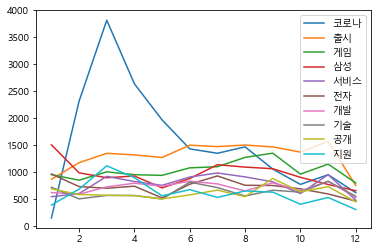

In [53]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

path = "malgun.ttf"
fonrprop = fm.FontProperties(fname=path, size = 18).get_name()

plt.rc('font',family=fonrprop)

noun_list_2020_most = noun_list_2020[0:10]
x_values = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
list_x   = [1,2,3,4,5,6,7,8,9,10,11,12]

for i in range(0,10,1):
    x_values[i] = noun_list_2020_most[i][0]

for w in noun_list_2020_most :
    list_y = [0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(0,100,1):
        if noun_list_january[i][0] == w[0] :
            list_y[0] = noun_list_january[i][1]
        if noun_list_february[i][0] == w[0] :
            list_y[1] = noun_list_february[i][1]
        if noun_list_march[i][0] == w[0] :
            list_y[2] = noun_list_march[i][1]
        if noun_list_april[i][0] == w[0] :
            list_y[3] = noun_list_april[i][1]
        if noun_list_may[i][0] == w[0] :
            list_y[4] = noun_list_may[i][1]
        if noun_list_june[i][0] == w[0] :
            list_y[5] = noun_list_june[i][1]
        if noun_list_july[i][0] == w[0] :
            list_y[6] = noun_list_july[i][1]
        if noun_list_august[i][0] == w[0] :
            list_y[7] = noun_list_august[i][1]
        if noun_list_september[i][0] == w[0] :
            list_y[8] = noun_list_september[i][1]
        if noun_list_october[i][0] == w[0] :
            list_y[9] = noun_list_october[i][1]
        if noun_list_november[i][0] == w[0] :
            list_y[10] = noun_list_november[i][1]
        if noun_list_december[i][0] == w[0] :
            list_y[11] = noun_list_december[i][1]
        
    plt.plot(list_x, list_y)        
    
plt.legend(x_values)

plt.show()